# Logistic Regression Model 2 #

## Import Libraries ##

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
import math

## Model and Gradient Descent Algorithm Code ## 

In [2]:
def gradient_descent_without_scikit(y_train_n, w_init, b_init, x_train_n, iterations, a):

    m = x_train_n.shape[0]
    dj_db_history = np.zeros(iterations)
    dj_dw_history = np.zeros((iterations, w_init.size))
    j_history = np.zeros(iterations)
    y_pred_history = np.zeros((iterations,m))
    w = w_init
    b = b_init

    y_pred = compute_y_pred(w, x_train_n, b)
    for i in range(iterations):
        dj_db, dj_dw = compute_gradient_1(y_pred, y_train_n, x_train_n)
        j_history[i] = compute_cost(y_pred, y_train_n)
        dj_db_history[i] = dj_db
        dj_dw_history[i] = dj_dw
        b = b - a * dj_db
        w = w - a * dj_dw
        y_pred = compute_y_pred(w, x_train_n, b)
        y_pred_history[i,:] = y_pred
    y_final_pred = predict(y_pred_history[-1])
    return w, b, y_final_pred, dj_dw_history, dj_db_history, j_history, y_pred_history

def compute_gradient_1(y_pred, y_train_n, x_train_n):
    m=y_pred.size
    n=x_train_n.shape[1]
    dj_dw = np.zeros(x_train_n.shape)
    dj_db = np.zeros(m)
    for i in range(m):
        dj_db[i]=(y_pred[i]-y_train_n[i])
        for j in range(n):
            dj_dw[i, j] = ((y_pred[i] - y_train_n[i]) * x_train_n[i, j])

    w_cost =np.zeros(n)
    for i in range(n):
        w_cost[i]=np.sum(dj_dw[:, i])

    w_cost = w_cost / m
    b_cost = np.sum(dj_db)/m
    return b_cost, w_cost


def compute_cost(y_predicted, y_actual):
    # both numpy arrays 
    loss = np.zeros(y_predicted.size)
    for i in range(y_predicted.size):
        loss[i]=(-1*y_actual[i]*math.log(y_predicted[i])) + (-1*(1-y_actual[i])*math.log(1-y_predicted[i]))
                 
    cost = np.sum(loss) / y_predicted.size
    return cost


def compute_y_pred(w, x, b):
    m = x.shape[0]
    y_pred = np.zeros(m)
    for i in range(m):
        z = np.dot(x[i], w)+b
        y_pred[i] = 1 / (1 + np.exp(-1*z) )
    return y_pred


def predict(y_pred):
    m = y_pred.size
    y_result = np.zeros(m, dtype=int)
    for i in range(m):
        if y_pred[i]>=0.5:
            y_result[i] = 1
        else:
            y_result[i] = 0
    return y_result

## Importing Data and Removing Nulls ##

In [3]:
# From https://www.kaggle.com/datasets/mlg-ulb/creditcardfraud
df = pd.read_csv('datasets/creditcard.csv')

In [4]:
df

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0


In [15]:
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,3.918649e-15,5.682686e-16,-8.761736e-15,2.811118e-15,-1.552103e-15,2.040130e-15,-1.698953e-15,-1.893285e-16,-3.147640e-15,...,1.473120e-16,8.042109e-16,5.282512e-16,4.456271e-15,1.426896e-15,1.701640e-15,-3.662252e-16,-1.217809e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [5]:
y = df['Class']
x = df.drop(['Class'], axis=1)

In [6]:
y.isnull().sum()

0

In [7]:
x.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
dtype: int64

In [9]:
# Not Needed cause x has no null values 
# x = x.fillna(0)

In [10]:
# x.isnull().sum()

## Split Data and Convert to Numpy Arrays ##

In [11]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=100)


In [12]:
x_train_n = x_train.to_numpy()
x_test_n = x_test.to_numpy()
y_train_n = y_train.to_numpy()
y_test_n = y_test.to_numpy()

In [13]:
y_train_n

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [17]:
def scale_feature(x_array, x_df, column_index):
    max_value = x_df.max()[column_index]

    for i in range(x_array[:, column_index].size):
        x_array[i, column_index] = x_array[i, column_index]/max_value
    return x_array

In [18]:
scale_feature(x_train_n, x, 0)

array([[ 7.75724571e-01,  2.02373437e+00, -4.29219074e-01, ...,
        -6.31453117e-05, -4.69472009e-02,  7.70000000e-01],
       [ 7.17880457e-01, -1.45286204e-01,  7.36735294e-01, ...,
        -6.35733592e-03,  1.46052802e-01,  3.61400000e+01],
       [ 3.18284411e-01, -3.01584625e+00, -1.92060555e+00, ...,
        -1.00725765e-01, -3.65256683e-01,  1.79950000e+02],
       ...,
       [ 9.05279180e-01, -1.82590077e+00, -5.39605236e-01, ...,
        -2.37095905e-01,  7.20982844e-02,  6.39400000e+02],
       [ 7.99278902e-01, -3.60814802e-01,  9.42994707e-01, ...,
        -2.83592612e-01,  1.73808486e-02,  1.99000000e+00],
       [ 2.73554331e-01,  6.31569364e-01, -8.99715102e-01, ...,
         5.63891145e-02,  7.18761919e-02,  2.35000000e+02]])

In [19]:
scale_feature(x_train_n, x, 29)

array([[ 7.75724571e-01,  2.02373437e+00, -4.29219074e-01, ...,
        -6.31453117e-05, -4.69472009e-02,  2.99713987e-05],
       [ 7.17880457e-01, -1.45286204e-01,  7.36735294e-01, ...,
        -6.35733592e-03,  1.46052802e-01,  1.40670955e-03],
       [ 3.18284411e-01, -3.01584625e+00, -1.92060555e+00, ...,
        -1.00725765e-01, -3.65256683e-01,  7.00435481e-03],
       ...,
       [ 9.05279180e-01, -1.82590077e+00, -5.39605236e-01, ...,
        -2.37095905e-01,  7.20982844e-02,  2.48879381e-02],
       [ 7.99278902e-01, -3.60814802e-01,  9.42994707e-01, ...,
        -2.83592612e-01,  1.73808486e-02,  7.74585499e-05],
       [ 2.73554331e-01,  6.31569364e-01, -8.99715102e-01, ...,
         5.63891145e-02,  7.18761919e-02,  9.14711519e-03]])

## Run Logistic Regression Model ##

In [20]:
m = x_train_n.shape[0]
n = x_train_n.shape[1]
w = np.zeros(n)
# w = np.array([.55, 6.6, 7.8, 8.0])
b = 0.0
iterations = 50
learning_rate = .0001

w, b, y_final_pred, dj_dw_history, dj_db_history, j_history, y_pred_history = gradient_descent_without_scikit(y_train_n, w, b, x_train_n, iterations, learning_rate)

convergence_point = j_history[-1]
gradient_w = dj_dw_history[-1]
gradient_b = dj_db_history[-1]
epsilon = j_history[-2] - j_history[-1]

print(f"the cost function decreased by {epsilon} "
      f"It should decrease by {learning_rate}")
print(f"lowest cost using gradient descent is {convergence_point}")

# expected = compute_cost(y_lr_train_pred, y_train_n)
# print(f"the expected cost using scikit LR is {expected}")

the cost function decreased by 3.2332665959922124e-05 It should decrease by 0.0001
lowest cost using gradient descent is 0.6915603686946284


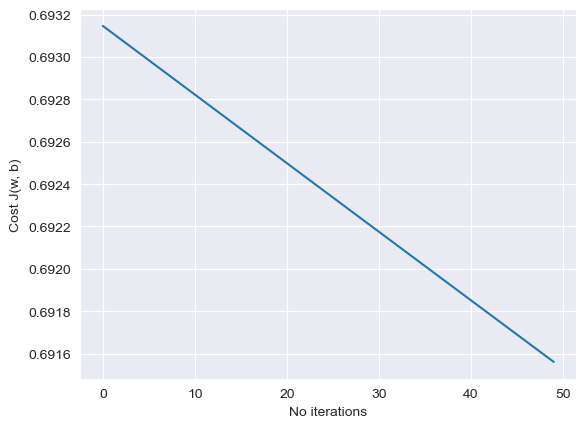

In [21]:
# Set the y-axis label
plt.ylabel('Cost J(w, b)')
# Set the x-axis label
plt.xlabel('No iterations')
plt.plot(np.arange(iterations), j_history)

In [22]:
w

array([-1.36708144e-03, -4.30271296e-05,  4.19058325e-05, -7.08343444e-05,
        4.51803266e-05, -2.68120269e-05, -1.23518305e-05, -5.05344150e-05,
        5.99718194e-06, -1.94097483e-05, -4.91120615e-05,  3.52778861e-05,
       -5.20368973e-05, -1.32106011e-06, -6.29590425e-05, -1.65147881e-07,
       -3.81075312e-05, -5.67119560e-05, -2.08243861e-05,  7.79383437e-06,
        2.64173755e-06,  1.00476859e-05,  1.34027394e-06, -5.53149723e-08,
       -1.62867322e-06,  1.59620635e-06,  1.49105442e-06,  1.98089919e-06,
        1.53179900e-06, -8.58617598e-06])

In [23]:
b

-0.0024893247986343394

In [24]:
y_final_pred

array([0, 0, 0, ..., 0, 0, 0])

## Compute Model Accuracy with Training and Testing Data ##

In [25]:
#Compute accuracy on our training set
# p = predict(X_train, w,b)
print('Train Accuracy: %f'%(np.mean(y_final_pred == y_train_n) * 100))

Train Accuracy: 99.885887


In [26]:
predicting_y_test = compute_y_pred(w, x_test_n, b)
predicting_y_test = predict(predicting_y_test)
predicting_y_test

array([0, 0, 0, ..., 0, 0, 0])

In [27]:
print('Train Accuracy of Calculated Model on Test Data: %f'%(np.mean(predicting_y_test == y_test_n) * 100))

Train Accuracy of Calculated Model on Test Data: 99.831467


## Miscellaneous ## 

In [56]:
# TESTING compute_y_pred function
m = x_train_n.shape[0]
n = x_train_n.shape[1]
w = np.zeros(n)
# w = np.array([.55, 6.6, 7.8, 8.0])
b = 0.0
y_pred = compute_y_pred(w, x_train_n, b)
y_pred

array([0.5, 0.5, 0.5, ..., 0.5, 0.5, 0.5])

In [59]:
# TESTING compute_cost function
pred_test = np.array([.5, .88, .9])
actual_test = np.array([0, 1, 1])
compute_cost(pred_test, actual_test)

0.3087803559092188